# Assignment 1, Question 1: Fashion

* TEAM NUMBER = 2
<br>

* TEAM MEMBER 1 = Naomi Moonen
* TEAM MEMBER 2 = Nick Sieraad
* TEAM MEMBER 3 = Vincie Vossenaar
* TEAM MEMBER 4 = Kevin Reijnders

## Fashion-MNIST 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. You can download it from OpenML and visualize some of the examples

In [1]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [2]:
# Our imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

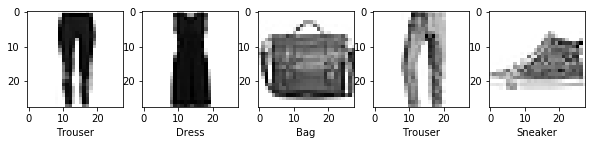

In [4]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[y[n]]))
plt.show();

**General note: We use random_state = 0 in all methods that involve randomness in order to ensure reproducibility of the results.**

**Part 1**

1_ Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM. (1 point)
- Take a *stratified* 10% subsample of the data. Use it for everything below
- Evaluate the 3 classifiers with their default settings. Use cross-validation with 3 folds, output the accuracy and standard deviation.
- Discuss which one works best.

Note: you can use a smaller sample while testing/bugfixing

First, we create a stratified 10% subsample of the data. We start by inspecting the proportions of the original dataset:

In [5]:
#Using pandas to discover the propertions in the set:
df_Fashion_MNIST = pd.DataFrame(X);
df_Fashion_MNIST['y'] = y;

In [6]:
#taking a look at the created dataframe:
df_Fashion_MNIST.head(5)

,0,1,2,3,...,781,782,783,y
0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0


In [7]:
#Taking a look at the proportions
df_Fashion_MNIST.groupby('y').count()[0]

y
0    7000
1    7000
2    7000
3    7000
4    7000
5    7000
6    7000
7    7000
8    7000
9    7000
Name: 0, dtype: int64

Looking at the output from the cell above, we see that each class contains 7000 observations. Hence, each of the 10 classes contains 10% of the data. These fractions should be conserved in the stratified 10% subsample of the data. In the two cells below, we create this subset and perform a simple test to check if it is correct.

In [8]:
X_rest, X_sample, y_rest, y_sample = train_test_split(X, y, test_size=0.1, random_state = 0, stratify=y)

In [9]:
#Number of observations right?
print("Shape of X: " + str(X_sample.shape)) #Correct
print("Shape of y: " + str(y_sample.shape)) #Correct

#Correctly stratified?
df_Fashion_MNIST_sample = pd.DataFrame(X_sample); #Correct
df_Fashion_MNIST_sample['y'] = y_sample; #Correct
df_Fashion_MNIST_sample.groupby('y').count()[0] #Correct

Shape of X: (7000, 784)
Shape of y: (7000,)


y
0    700
1    700
2    700
3    700
4    700
5    700
6    700
7    700
8    700
9    700
Name: 0, dtype: int64

In [10]:
X_sample.shape

(7000, 784)

Now we can start evaluating the 3 classifiers with their default settings. In the first 3 cells below, we fit the 3 classifiers to the data and compute their average accuracy and standard deviation.

In [11]:
#k-Nearest Neighbors
##takes a few min to run!
knn = KNeighborsClassifier(); #No parameters because default settings

acc_knn_fold_1, acc_knn_fold_2, acc_knn_fold_3 = cross_val_score(knn, X_sample, y=y_sample, cv=3) #takes quite long...
average_acc_knn = np.mean([acc_knn_fold_1, acc_knn_fold_2, acc_knn_fold_3]);
sd_acc_knn = np.std([acc_knn_fold_1, acc_knn_fold_2, acc_knn_fold_3]);

In [12]:
#Logistic Regression
##takes a few min to run!
logreg = LogisticRegression(random_state = 0); #random_state = 0 for reproducibility

acc_logreg_fold_1, acc_logreg_fold_2, acc_logreg_fold_3 = cross_val_score(logreg, X_sample, y=y_sample, cv=3) #takes quite long...
average_acc_logreg = np.mean([acc_logreg_fold_1, acc_logreg_fold_2, acc_logreg_fold_3]);
sd_acc_logreg = np.std([acc_logreg_fold_1, acc_logreg_fold_2, acc_logreg_fold_3]);

In [13]:
#Linear SVM
##takes a few min to run!
liSVM = LinearSVC(random_state = 0); #random_state = 0 for reproducibility

acc_liSVM_fold_1, acc_liSVM_fold_2, acc_liSVM_fold_3 = cross_val_score(liSVM, X_sample, y=y_sample, cv=3) #takes quite long...
average_acc_liSVM = np.mean([acc_liSVM_fold_1, acc_liSVM_fold_2, acc_liSVM_fold_3]);
sd_acc_liSVM = np.std([acc_liSVM_fold_1, acc_liSVM_fold_2, acc_liSVM_fold_3]);

The cell below allows us to compare the 3 classifiers. The k-Nearest Neighbor classifier has the highest mean accuracy and the smallest standard deviation. The Linear SVM comes in second according to these metrics and the Logistic Regression comes in third. The differences between the classifiers are, however, relatively minor, especially when we take into account the variability of the accuracies.

In [14]:
print("The accuracies of the k-NN classifier are: {}".format([acc_knn_fold_1, acc_knn_fold_2, acc_knn_fold_3]))
print("The mean accuracy and the sd of the k-NN classifier are: {}".format([average_acc_knn, sd_acc_knn]))
print("\n")

print("The accuracies of the Logistic Regression are: {}".format([acc_logreg_fold_1, acc_logreg_fold_2, acc_logreg_fold_3]))
print("The mean accuracy and the sd of the Logistic Regression are: {}".format([average_acc_logreg, sd_acc_logreg]))
print("\n")

print("The accuracies of the Linear SVM are: {}".format([acc_liSVM_fold_1, acc_liSVM_fold_2, acc_liSVM_fold_3]))
print("The mean accuracy and the sd of the Linear SVM are: {}".format([average_acc_liSVM, sd_acc_liSVM]))

The accuracies of the k-NN classifier are: [0.8064102564102564, 0.8090128755364807, 0.8107296137339056]
The mean accuracy and the sd of the k-NN classifier are: [0.8087175818935476, 0.0017756896639536993]


The accuracies of the Logistic Regression are: [0.7491452991452991, 0.7600858369098712, 0.7360515021459227]
The mean accuracy and the sd of the Logistic Regression are: [0.7484275460670311, 0.009825093349765444]


The accuracies of the Linear SVM are: [0.7435897435897436, 0.7858369098712447, 0.7562231759656652]
The mean accuracy and the sd of the Linear SVM are: [0.7618832764755513, 0.017705617150887604]


**Part 2**

2_ Tune the parameters using GridSearchCV. (2 points)
- Vary the main hyperparameter (C or k) for all 3 models. Do the results improve?  Which ranges have an effect on performance?
- Visualize both the test score and training score as function of the parameters for all three models. Discuss when (for which values) the model is underfitting or overfitting.

Note: you can use a line plot or 1D heatmap for visualization. Use again 3-fold cross-validation and accuracy.

In [15]:
# You can use this generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name):
    plt.figure()
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax = plt.gca()
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    plt.title(grid_search.best_estimator_.__class__.__name__)
    print('Best configuration:' + str(grid_search.best_params_))
    print('Best score (ACC):' + str(grid_search.best_score_))

Firstly, we use GridSearch to fit the models with a variety of hyperparameters. The full sample is used because the assignment does not require the evaluation of the model with the best parameters on a seperate test set. Note that the 3 cells below take a relatively long time to run (15-30 minutes) due to the large amount of features and observations in the sample.

It was chosen to use the same values for varying the hyperparameters as in the lectures and tutorials. As the grid searches already take a long time to run, an exhaustive search for optimal hyperparameters is beyond the scope of this assignment. We will, however, look into some other parameters than the default set to provide some more depth when examining the effect of  hyperparameters on performance.

In [16]:
param_grid_knn = {'n_neighbors': [1,3,5,7,9,11,33,55,77,99]};
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3);
grid_search_knn.fit(X_sample, y_sample);

In [17]:
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]};
grid_search_logreg = GridSearchCV(LogisticRegression(random_state = 0), param_grid_logreg, cv=3);
grid_search_logreg.fit(X_sample, y_sample);

In [18]:
param_grid_liSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]};
grid_search_liSVM = GridSearchCV(LinearSVC(random_state = 0), param_grid_liSVM, cv=3);
grid_search_liSVM.fit(X_sample, y_sample);

We will now retrieve some interesting variables of the outcomes of the GridSearches to see what parameter values yield good results, and which parameter ranges affect performance most.

In [19]:
#Results that we are interested in from knn: The mean test score and std of the models with the varying hyperparameters
pd.DataFrame({"n_neighbors": [1,3,5,7,9,11,33,55,77,99], "mean_test_score": 
           grid_search_knn.cv_results_['mean_test_score'], "std_test_score":grid_search_knn.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_knn.cv_results_['rank_test_score']})

,n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.80,7.19e-03,6
1,3,0.80,3.94e-03,3
2,5,0.81,1.78e-03,1
3,7,0.80,3.38e-03,2
4,9,0.80,2.94e-03,4
5,11,0.80,7.30e-04,5
6,33,0.78,7.94e-03,7
7,55,0.77,7.25e-03,8
8,77,0.76,4.56e-03,9
9,99,0.76,6.15e-03,10


As can be seen in the data frame above, the mean test score varies slightly between the different choices for the number of neighbors (~5%), although these differences become more significant when taking into account the small standard deviations of the test scores. The results first seem to improve when moving from 1 to 5 neighbors. The results seem to worsen according to the table when using more than 5 neighbors. Hence, it is suspected that the model starts to overfit the data when less than approximately 5 neighbors are used and that it starts to underfit when more than approximately 5 neighbors are used. We use approximately here because 4 or 6 neighbors may also be a good choice. These choices are, however, not treated in detail due to the long running time of the script and the fact that such a small difference in the number of neighbors will probably only lead to negligibly small accuracy improvements.

In [20]:
#Results that we are interested in from logistic regression: The mean test score and std of the models with the varying hyperparameters
pd.DataFrame({'C': [0.001, 0.01, 0.1, 1, 10, 100], "mean_test_score": 
           grid_search_logreg.cv_results_['mean_test_score'], "std_test_score":grid_search_logreg.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_logreg.cv_results_['rank_test_score']})

,C,mean_test_score,std_test_score,rank_test_score
0,1.00e-03,0.79,8.73e-03,1
1,1.00e-02,0.77,7.55e-03,2
2,1.00e-01,0.75,1.06e-02,3
3,1.00e+00,0.75,9.82e-03,4
4,1.00e+01,0.74,5.68e-03,6
5,1.00e+02,0.75,9.57e-03,5


Within the chosen range for $C$, the accuracy is high when $C=0.001$, then decreases until $C=10$ and consequently starts to rise again. Therefore, it is unclear whether $C=0.001$ is indeed the a good value for hyperparameter $C$, thus a wider range of values should be examined for $C$. This analysis is performed below:

In [21]:
param_grid_logreg_1 = {'C': [1e-15, 1e-10, 1e-5, 1, 1e5, 1e10, 1e15]};

grid_search_logreg_1 = GridSearchCV(LogisticRegression(random_state = 0), param_grid_logreg_1, cv=3);
grid_search_logreg_1.fit(X_sample, y_sample);

pd.DataFrame({'C': [1e-15, 1e-10, 1e-5, 1, 1e5, 1e10, 1e15], "mean_test_score": 
           grid_search_logreg_1.cv_results_['mean_test_score'], "std_test_score":grid_search_logreg_1.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_logreg_1.cv_results_['rank_test_score']})

,C,mean_test_score,std_test_score,rank_test_score
0,1.00e-15,0.31,1.17e-02,7
1,1.00e-10,0.57,1.79e-03,6
2,1.00e-05,0.82,7.23e-03,1
3,1.00e+00,0.75,9.82e-03,2
4,1.00e+05,0.75,8.28e-03,2
5,1.00e+10,0.75,1.17e-02,4
6,1.00e+15,0.75,1.09e-02,5


When $C=10^{-15}$, the mean test score is merely $0.21$. The highest mean test score of the alternatives is reached when $C=10^{-5}$. As $C$ gets larger than this value, we can see that the mean test score decreases again and stabilizes at $0.75$. Parameter ranges above (and including) $C=0$ do not seem to affect the performance of the model. As $C$ increases, the model has less regularization, thus it seems like the maximum complexity of the model is reached at approximately $C=0$, and increasing the $C$ hyperparameter beyond this value does not seem to affect performance anymore.

In [22]:
#Results that we are interested in from linear SVM: The mean test score and std of the models with the varying hyperparameters
pd.DataFrame({'C': [0.001, 0.01, 0.1, 1, 10, 100], "mean_test_score": 
           grid_search_liSVM.cv_results_['mean_test_score'], "std_test_score":grid_search_liSVM.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_liSVM.cv_results_['rank_test_score']})

,C,mean_test_score,std_test_score,rank_test_score
0,1.00e-03,0.77,0.01,1
1,1.00e-02,0.77,0.02,5
2,1.00e-01,0.77,0.01,2
3,1.00e+00,0.76,0.02,6
4,1.00e+01,0.77,0.02,3
5,1.00e+02,0.77,0.02,3


In the table above, it can be seen that the difference between the values for hyperparameter $C$ are rather small for the linear SVM, especially when considering the standard deviations of the results which are all close to $0.01$. Hence, a wider range of parameters should be examined for the linear support vector machine. This analysis is performed below:

In [23]:
param_grid_liSVM_1 = {'C': [1e-15, 1e-10, 1e-5, 1, 1e5, 1e10, 1e15]};

grid_search_liSVM_1 = GridSearchCV(LinearSVC(random_state = 0), param_grid_liSVM_1, cv=3);
grid_search_liSVM_1.fit(X_sample, y_sample);

pd.DataFrame({'C': [1e-15, 1e-10, 1e-5, 1, 1e5, 1e10, 1e15], "mean_test_score": 
           grid_search_liSVM_1.cv_results_['mean_test_score'], "std_test_score":grid_search_liSVM_1.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_liSVM_1.cv_results_['rank_test_score']})

,C,mean_test_score,std_test_score,rank_test_score
0,1.00e-15,0.31,1.17e-02,7
1,1.00e-10,0.66,6.01e-03,6
2,1.00e-05,0.80,9.12e-03,1
3,1.00e+00,0.76,1.77e-02,5
4,1.00e+05,0.77,1.83e-02,2
5,1.00e+10,0.77,1.83e-02,2
6,1.00e+15,0.77,1.83e-02,2


In the dataframe of the cell above, we see that the mean test score sharply decreases when $C$ reaches very low values ($10^{-10}$ and below). The highest mean test score is achieved when $C=10^{-5}$, and when increasing the value of $C$ further the mean test score decreases only slightly, indicating that such ranges for $C$ only affect performance slightly. In the cell below, we zoom in on the region surrounding $C=10^{-5}$ to see how this range affects the performance of the linear support vector machine.

In [24]:
param_grid_liSVM_2 = {'C': [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08]};

grid_search_liSVM_2 = GridSearchCV(LinearSVC(random_state = 0), param_grid_liSVM_2, cv=3);
grid_search_liSVM_2.fit(X_sample, y_sample);

pd.DataFrame({'C': [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08], "mean_test_score": 
           grid_search_liSVM_2.cv_results_['mean_test_score'], "std_test_score":grid_search_liSVM_2.cv_results_['std_test_score'], 
           "rank_test_score": grid_search_liSVM_2.cv_results_['rank_test_score']})

,C,mean_test_score,std_test_score,rank_test_score
0,1.00e-02,0.77,1.56e-02,7
1,1.00e-03,0.77,1.10e-02,6
2,1.00e-04,0.78,9.76e-03,5
3,1.00e-05,0.80,9.12e-03,3
4,1.00e-06,0.82,6.52e-03,2
5,1.00e-07,0.83,4.89e-03,1
6,1.00e-08,0.79,7.35e-03,4


We can see in the dataframe above that $C$ seems about optimal when $C=10^{-6}$. The mean test score seems to vary quite a bit when $10^{-2} \leq C \leq 10^{-8}$, indicating that this range has a significant effect on performance.

Below, the test score and training score as a function of the parameters if visualized for all three models.

Best configuration:{'n_neighbors': 5}
Best score (ACC):0.8087142857142857


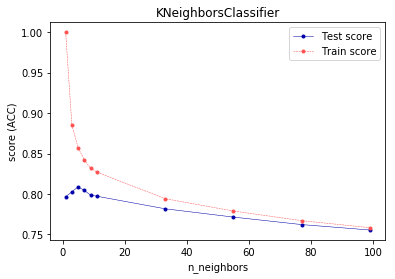

In [25]:
#KNN
plot_tuning(grid_search_knn, "n_neighbors")

If we take a look at the plot above, it seems that the model overfits when the n_neighbors hyperparameter is very low (1 to 3), and starts to underfit when the n_neighbors hyperparameter reaches a value of 7. As the n_neighbors hyperparameter increases further, the model underfits more and more.

Best configuration:{'C': 0.001}
Best score (ACC):0.7864285714285715


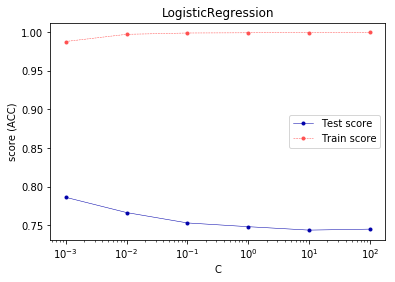

In [26]:
#Logistic Regression
plot_tuning(grid_search_logreg, "C")
plt.xscale('log')

Best configuration:{'C': 1e-05}
Best score (ACC):0.825


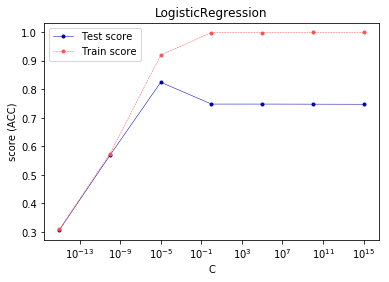

In [27]:
plot_tuning(grid_search_logreg_1, "C")
plt.xscale('log')

In the two plots above, we can see that the best test score is reached approximately when $C=10^{-5}$. When the value of $C$ decreases further, the test and train score start to converge and the model starts to underfit the data. The model starts to overfit when $C$ takes on values higher than approximately $10^{-5}$.  

Best configuration:{'C': 0.001}
Best score (ACC):0.7688571428571429


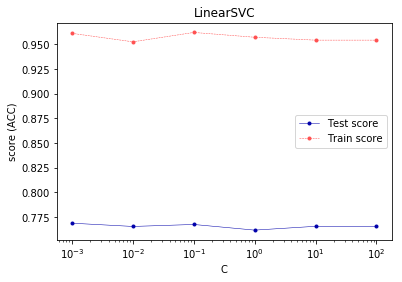

In [28]:
#Linear SVM
plot_tuning(grid_search_liSVM, "C")
plt.xscale('log')

Best configuration:{'C': 1e-05}
Best score (ACC):0.8002857142857143


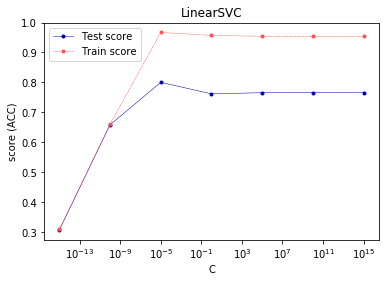

In [29]:
plot_tuning(grid_search_liSVM_1, "C")
plt.xscale('log')

Best configuration:{'C': 1e-07}
Best score (ACC):0.8257142857142857


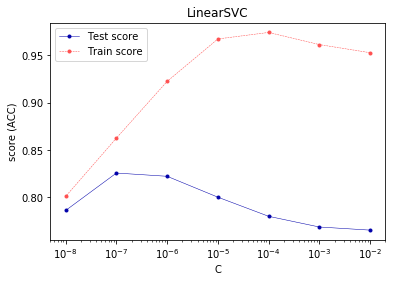

In [30]:
plot_tuning(grid_search_liSVM_2, "C")
plt.xscale('log')

The three plots above show that the model is best when $C$ equals approximately $10^{-7}$. A lower $C$ leads to a model that is underfit while a higher $C$ leads to a model that overfits, as in these situations the training score is a lot higher than the test score.

**Part 3**

3_ Analyze which types of misclassifications are made (1 points)
- Create a standard train_test split
- Train Logistic Regression on the training data and generate predictions on the test set
- Visualize (like above) a few examples that are misclassified by Logistic Regression. Discuss: are these indeed difficult cases?
- Build the 'confusion_matrix' of all predictions. Discuss which classes are often confused.

In [31]:
#Generating test_train split
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(
X_sample, y_sample, stratify=y_sample, random_state = 0)

In [32]:
#Training Logistic Regression & generating predictions
logreg_Q3 = LogisticRegression(random_state = 0)
logreg_Q3.fit(X_sample_train, y_sample_train)
logreg_pred = logreg_Q3.predict(X_sample_test)

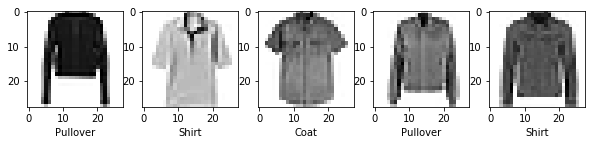

In [33]:
#Visualizing misclassified examples

#Which indices are misclassified?
mask = y_sample_test != logreg_pred
misclassified_indices = []

for i in range(len(mask)):
    if mask[i] == True:
        misclassified_indices.append(i)

#Creating the plots
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_sample_test[misclassified_indices[i]].reshape(28,28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel(fmnist_classes[logreg_pred[misclassified_indices[i]]])

plt.show();

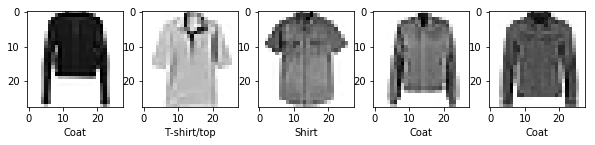

In [34]:
#What are these actually?
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_sample_test[misclassified_indices[i]].reshape(28,28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel(fmnist_classes[y_sample_test[misclassified_indices[i]]])

plt.show();

Although some mistakes are quite silly, most cases are somewhat difficult. For instance, two of the coats were classified as pullovers. Upon inspecting the picture, it seems that these coats do indeed seem quite similar to pullovers in the low-resolution images.

Below, we will perform a little test to check the correctly classified examples. 

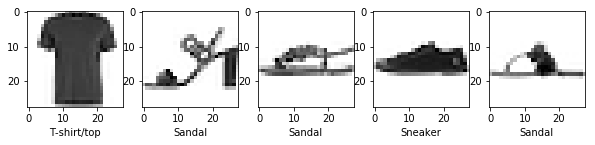

In [35]:
#Small test to see if above works for correctly classified examples as well

#Which indices are correctly classified?
mask = y_sample_test == logreg_pred
corclassified_indices = []

for i in range(len(mask)):
    if mask[i] == True:
        corclassified_indices.append(i)

#Creating the plots
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_sample_test[corclassified_indices[i]].reshape(28,28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel(fmnist_classes[logreg_pred[corclassified_indices[i]]])

plt.show();

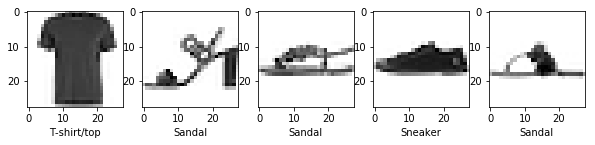

In [36]:
#Are these really correct?
#Creating the plots
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_sample_test[corclassified_indices[i]].reshape(28,28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel(fmnist_classes[y_sample_test[corclassified_indices[i]]])

plt.show();

Now, we will build the confusion matrix of all predictions:

In [37]:
#confusion matrix
y_true = y_sample_test;
y_pred = logreg_pred;
confusion_matrix(y_true, y_pred)

array([[125,   2,   8,   2,   4,   0,  31,   0,   3,   0],
       [  1, 163,   2,   3,   3,   0,   3,   0,   0,   0],
       [  9,   4, 106,   3,  29,   0,  20,   0,   4,   0],
       [ 15,   8,   3, 131,  10,   0,   6,   0,   2,   0],
       [  3,   1,  29,   8, 104,   0,  26,   0,   4,   0],
       [  4,   1,   3,   0,   5, 139,   4,  10,   2,   7],
       [ 22,   0,  26,   9,  32,   0,  84,   0,   2,   0],
       [  0,   0,   0,   0,   0,   8,   1, 153,   0,  13],
       [  5,   0,   9,   5,   4,   3,   8,   2, 139,   0],
       [  0,   1,   2,   0,   0,   5,   3,   6,   0, 158]], dtype=int64)

This is rather difficult to interpret, thus we wrap the data in a dataframe below to enhance understandability.

In [38]:
#Let's make the confusion matrix easier to interpret
confusion_matrix_fashion = pd.DataFrame(confusion_matrix(y_true, y_pred), index = fmnist_classes.values(), 
                                        columns = fmnist_classes.values())

#Creating a column containing the sums of the rows
confusion_matrix_fashion['Total'] = [sum(confusion_matrix_fashion.iloc[i,:].values) for i in range(len(confusion_matrix_fashion))]

#Creating a row containing the sums of the columns
col_sums = [sum(confusion_matrix_fashion.iloc[:,i].values) for i in range(11)];
confusion_matrix_fashion = confusion_matrix_fashion.append({fmnist_classes[i]:col_sums[i] for i in range(10)}, ignore_index=True);
confusion_matrix_fashion.iloc[10,10] = col_sums[10]

#Setting row labels again
row_labels = list(fmnist_classes.copy().values());
row_labels.append("Total");
confusion_matrix_fashion.index = row_labels

In [39]:
pd.set_option('display.max_columns', 11)
confusion_matrix_fashion

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,Total
T-shirt/top,125.0,2.0,8.0,2.0,4.0,0.0,31.0,0.0,3.0,0.0,175.0
Trouser,1.0,163.0,2.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,175.0
Pullover,9.0,4.0,106.0,3.0,29.0,0.0,20.0,0.0,4.0,0.0,175.0
Dress,15.0,8.0,3.0,131.0,10.0,0.0,6.0,0.0,2.0,0.0,175.0
Coat,3.0,1.0,29.0,8.0,104.0,0.0,26.0,0.0,4.0,0.0,175.0
Sandal,4.0,1.0,3.0,0.0,5.0,139.0,4.0,10.0,2.0,7.0,175.0
Shirt,22.0,0.0,26.0,9.0,32.0,0.0,84.0,0.0,2.0,0.0,175.0
Sneaker,0.0,0.0,0.0,0.0,0.0,8.0,1.0,153.0,0.0,13.0,175.0
Bag,5.0,0.0,9.0,5.0,4.0,3.0,8.0,2.0,139.0,0.0,175.0
Ankle boot,0.0,1.0,2.0,0.0,0.0,5.0,3.0,6.0,0.0,158.0,175.0


We'll first perform some quick checks to see how to interpret the confusion matrix:

In [40]:
#Some quick checks on the confusion matrix
print("The total number of T-shirt/top predicts is {}".format(sum(y_pred==0)))
print("The actual number of T-shirts in the data is {}".format(sum(y_true==0)))
print("\n")
print("The total number of sandal predicts is {}".format(sum(y_pred==5)))
print("The actual number of sandal in the data is {}".format(sum(y_true==5)))

The total number of T-shirt/top predicts is 184
The actual number of T-shirts in the data is 175


The total number of sandal predicts is 155
The actual number of sandal in the data is 175


* The T-shirt/top is quite often misclassified as a shirt and sometimes as a pullover.
* The trouser is not misclassified all that much.
* The pullover is often classified as a coat and quite often as a shirt.
* The dress is sometimes classified is a T-shirt/top or or coat
* The coat is quite often misclassified as a pullover or a shirt
* The sandal is not misclassified all that much, though most misclassifications are as a sneaker.
* The shirt is misclassified most often, mainly as a T-shirt/top, pullover or coat.
* The sneaker is not misclassified very much.
* The bag is also not misclassified a lot, but when it is misclassified it is usually as a pullover or a shirt.
* The ankle boot is also not misclassified all that much.

**Part 4**

4_ Visualize the model parameters (1 point)
- Retrieve the model parameters (coefficients) for LogisticRegression and Linear Support Vector Machines
- Plot the coefficients as a 28*28 image as above. 
- Interpret the results. Which pixels does the models pay most attention to? Why? Is there a difference between both models?

For this question, we will use the coefficients that were found in the best estimator of the logistic regression and the linear support vector machine from the previous question. The cell below shows a part of these coefficients.

In [41]:
print("Coefficients for the logistic regression: \n {}".format(grid_search_logreg.best_estimator_.coef_))
print("\n")
print("Coefficients for the linear SVM: \n {}".format(grid_search_liSVM.best_estimator_.coef_))

Coefficients for the logistic regression: 
 [[-0.     0.001 -0.006 ...  0.001 -0.01  -0.001]
 [-0.     0.    -0.    ...  0.001  0.003  0.   ]
 [ 0.     0.001 -0.003 ...  0.015  0.013  0.002]
 ...
 [-0.    -0.    -0.    ... -0.001 -0.001 -0.   ]
 [-0.    -0.     0.001 ... -0.006 -0.001 -0.   ]
 [-0.     0.    -0.    ...  0.004  0.001  0.   ]]


Coefficients for the linear SVM: 
 [[-0.     0.    -0.001 ...  0.001 -0.001  0.   ]
 [ 0.     0.    -0.    ...  0.     0.001  0.   ]
 [ 0.     0.    -0.001 ...  0.003  0.004  0.001]
 ...
 [ 0.     0.    -0.    ... -0.001 -0.001  0.   ]
 [-0.     0.     0.    ... -0.002 -0.    -0.   ]
 [ 0.    -0.     0.    ...  0.001  0.     0.   ]]


Below, we will plot the coefficients of the logistic regression as a 28x28 image.

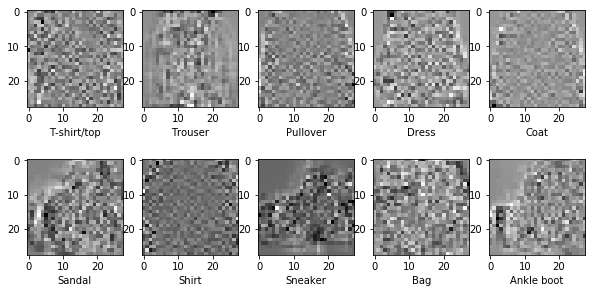

In [42]:
#Logistic Regression

logreg_coef = grid_search_logreg.best_estimator_.coef_

fig, axes = plt.subplots(2, 5,  figsize=(10, 5))

x=0 #Counts how far we are in the loop, i.e. what class we are looking at.

for i in range(2):
    for j in range(5):
        axes[i,j].imshow(logreg_coef[x].reshape(28,28), cmap=plt.cm.gray_r)
        axes[i,j].set_xlabel(fmnist_classes[x])
        x+=1
plt.show()

Although it might seem odd at first sight, it is correct that the logistic regression has 10 sets of 784 coefficients. This is due to the "one-vs.-rest" approach when using linear models for multiclass classification, as described in "Introduction to Machine Learning with Python" by Müller & Guido (2016).

In the images, grey pixels indicate that the coefficient is 0 (e.g. see the left upper edge of the "Sneaker" figure). Hence, as the color of pixel becomes more non-grey then this means that the model pays more attention to the pixel. We can for instance see a difference between on the one hand the sandal, sneaker and ankle boot and on the other hand the other pieces of clothing.

Below, we will plot the coefficients of the linear SVM as a 28x28 image.

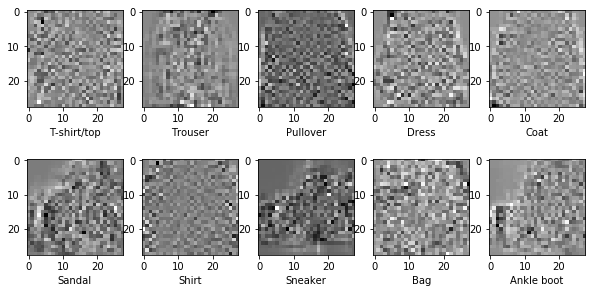

In [43]:
#Linear support vector machine
liSVM_coef = grid_search_liSVM.best_estimator_.coef_

fig, axes = plt.subplots(2, 5,  figsize=(10, 5))

x=0 #Counts how far we are in the loop, i.e. what class we are looking at.

for i in range(2):
    for j in range(5):
        axes[i,j].imshow(liSVM_coef[x].reshape(28,28), cmap=plt.cm.gray_r)
        axes[i,j].set_xlabel(fmnist_classes[x])
        x+=1
plt.show()

These images look very similar to those generated from the coefficients of the logistic regression. Merely some very slight differences in the shades are visible between the logistic regression and the linear support vector machine. It seems that both models pay most attention to approximately the same pixels.